In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
a = [67, 56, 62, 70, 89]
b = [42, 55, 61, 51, 62]

vals = a + b
groups = ['Gene_a']*5 + ['Control']*5

In [27]:
from scipy import stats
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=22.5, pvalue=0.046532985074510584)

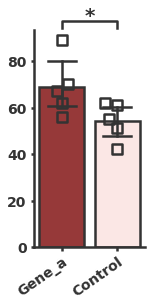

In [69]:
plt.figure(figsize = (2,4))

ax = sns.barplot(x = groups, y = vals, capsize = 0.5, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, 
                palette = ['brown', 'mistyrose'], errcolor = '0.2')

kwargs = {'edgecolor':'0.2', 'linewidth':2.5, 'fc': 'none'}

ax = sns.swarmplot(x = groups, y = vals, marker = 's', s = 10, **kwargs)

prev_lim = ax.get_ylim()[1]

max_val = max(vals)
plt.plot([0,0,1,1], [max_val+5, max_val+8, max_val+8, max_val+5], lw = 2.5, color = '0.2', 
        clip_on = False)

plt.text(x = 0.5, y = max_val+8, s = '*', ha = 'center', size = 20, weight = 'bold', color = '0.2')


for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(size = 14, rotation = 35, rotation_mode = 'anchor', ha = 'right', weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.ylim(top = prev_lim)


plt.savefig('bar_test.svg', bbox_inches = 'tight')
plt.savefig('bar_test.png', bbox_inches = 'tight', dpi = 250, facecolor = ax.get_facecolor())

In [39]:
import pandas as pd

In [40]:
a = [67, 56, 62, 70, 89, 45, 37, 50, 60, 34]
b = [42, 55, 61, 51, 62, 25, 41, 35, 38, 22]

vals = a + b
gene = ['Gene_a']*10 + ['Control']*10

groups = ['Treated']*5 + ['Untreated']*5 + ['Treated']*5 + ['Untreated']*5

df = pd.DataFrame(zip(vals, gene, groups), columns = ['Value', 'Gene', 'Treatment'])

In [42]:
df.head()

,Value,Gene,Treatment
0,67,Gene_a,Treated
1,56,Gene_a,Treated
2,62,Gene_a,Treated
3,70,Gene_a,Treated
4,89,Gene_a,Treated


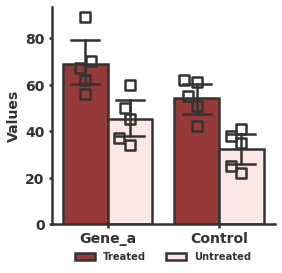

In [63]:
plt.figure(figsize = (4,4))

ax = sns.barplot(data = df, x = 'Gene', y = 'Value', capsize = 0.25, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, 
                palette = ['brown', 'mistyrose'], errcolor = '0.2', hue = 'Treatment')

kwargs = {'edgecolor':'0.2', 'linewidth':2.5, 'fc': 'none'}

ax = sns.swarmplot(data = df, x = 'Gene', y = 'Value', hue = 'Treatment',
                   dodge = True, marker = 's', s = 10, **kwargs)

prev_lim = ax.get_ylim()[1]

max_val = max(vals)


handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[2:], labels[2:], loc = 10, bbox_to_anchor = (0.5, -0.15), 
          ncol = 2, frameon = False, fontsize = 14, labelcolor = '0.2', prop = {'weight': 'bold'})



for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(size = 14, ha = 'center', weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.xlabel('')
plt.ylabel('Values', size = 14, weight = 'bold', color = '0.2')

#plt.ylim(top = prev_lim)


plt.savefig('bar_test_big.svg', bbox_inches = 'tight')
plt.savefig('bar_test_big.png', bbox_inches = 'tight', dpi = 250, facecolor = ax.get_facecolor())

In [67]:
for e in ax.lines:
    xy = e.get_xydata()
    if xy[0,0] == xy[1,0]:
        print(xy)

[[-0.2 60.4]
 [-0.2 79.2]]
[[ 0.8 47.4]
 [ 0.8 60.2]]
[[ 0.2   37.8  ]
 [ 0.2   53.415]]
[[ 1.2 25.8]
 [ 1.2 38.6]]
